# $$ Data \ Analysis \ and \ Forecasting \ of  Sales \ Data $$

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff

# pip install pmdarima
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt            
from tabulate import tabulate               

## Import Data:

In [2]:
fdf=pd.read_excel('Proj4_TimeSeries_Sales_Data_Project.xls',index_col='Order Date',parse_dates=True)
fdf.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
fdf.columns

Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Pro

In [5]:
print(f'{fdf.shape[0]} samples and {fdf.shape[1]} features in the sales  dataset.')

9994 samples and 20 features in the sales  dataset.


In [6]:
fdf.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
fdf.describe(include='O').T

,count,unique,top,freq
Order ID,9994,5009,CA-2017-100111,14
Ship Mode,9994,4,Standard Class,5968
Customer ID,9994,793,WB-21850,37
Customer Name,9994,793,William Brown,37
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Product ID,9994,1862,OFF-PA-10001970,19


In [8]:
fdf.describe(include='datetime64')

,Ship Date
count,9994
unique,1334
top,2015-12-16 00:00:00
freq,35
first,2014-01-07 00:00:00
last,2018-01-05 00:00:00


In [9]:
total = fdf.isnull().sum().sort_values(ascending=False)
percent = (fdf.isnull().sum()/fdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percent'])
missing_data

,Total missing values,Percent
Row ID,0,0.0
Order ID,0,0.0
Discount,0,0.0
Quantity,0,0.0
Sales,0,0.0
Product Name,0,0.0
Sub-Category,0,0.0
Category,0,0.0
Product ID,0,0.0
Region,0,0.0


In [10]:
df=fdf.sort_index()
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,909,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
2017-12-30,908,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [11]:
def data_type(df):
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique()<50:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous

categorical,continuous=data_type(fdf)

table=[categorical,continuous]
print(tabulate({'Categorical':categorical,'Continuous':continuous},headers=['categorical','continuous']
))

categorical    continuous
-------------  -------------
Ship Mode      Row ID
Segment        Order ID
Country        Ship Date
State          Customer ID
Region         Customer Name
Category       City
Sub-Category   Postal Code
Quantity       Product ID
Discount       Product Name
               Sales
               Profit


# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Exploring Feature: Ship Mode:

In [12]:
def info_of(col):
    print(f"unique values in {col} are: {df[col].unique()}")
    print(f"mode of {col} are: {df[col].mode()[0]}") 
    print(f"number of missing values in {col} is: {df[col].isnull().sum()}") 
    if df[col].isnull().sum()>0:
        print(f"there are null values in: {col} column")


In [13]:
info_of('Ship Mode')

unique values in Ship Mode are: ['Standard Class' 'First Class' 'Second Class' 'Same Day']
mode of Ship Mode are: Standard Class
number of missing values in Ship Mode is: 0


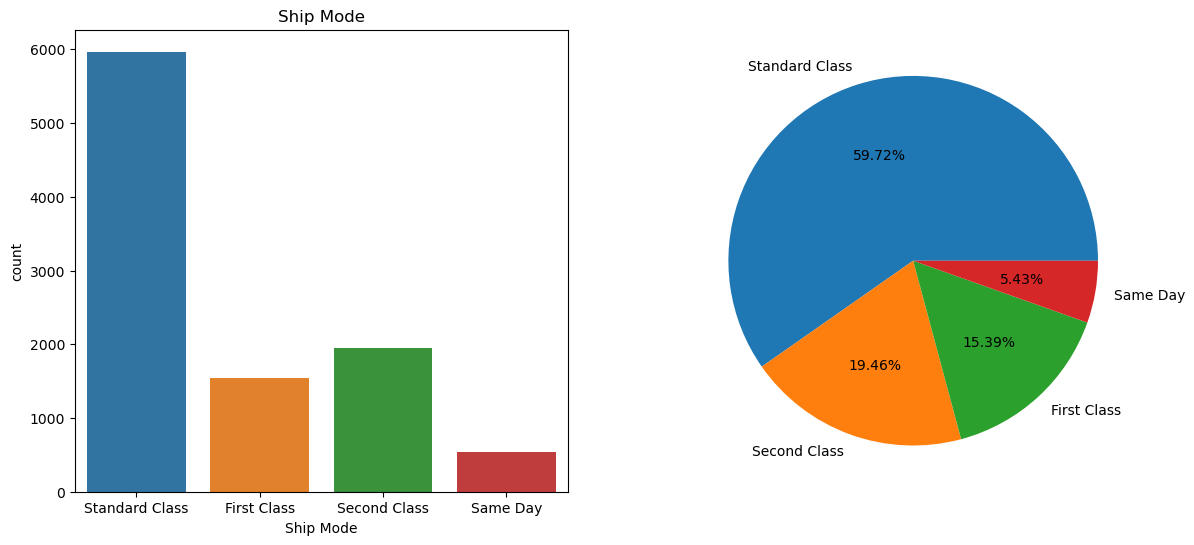

In [14]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].set_title('Ship Mode')
shipmode=df['Ship Mode'].value_counts()
labels=list(df['Ship Mode'].value_counts().index)

sns.countplot(x=df['Ship Mode'],ax=ax[0])
plt.pie(shipmode,labels=labels,autopct= "%0.2f%%")
plt.show()

### Standard class shipping was preferred by 60% of the customers.

## Exploring Feature: Segment

In [15]:
info_of('Segment')

unique values in Segment are: ['Consumer' 'Home Office' 'Corporate']
mode of Segment are: Consumer
number of missing values in Segment is: 0


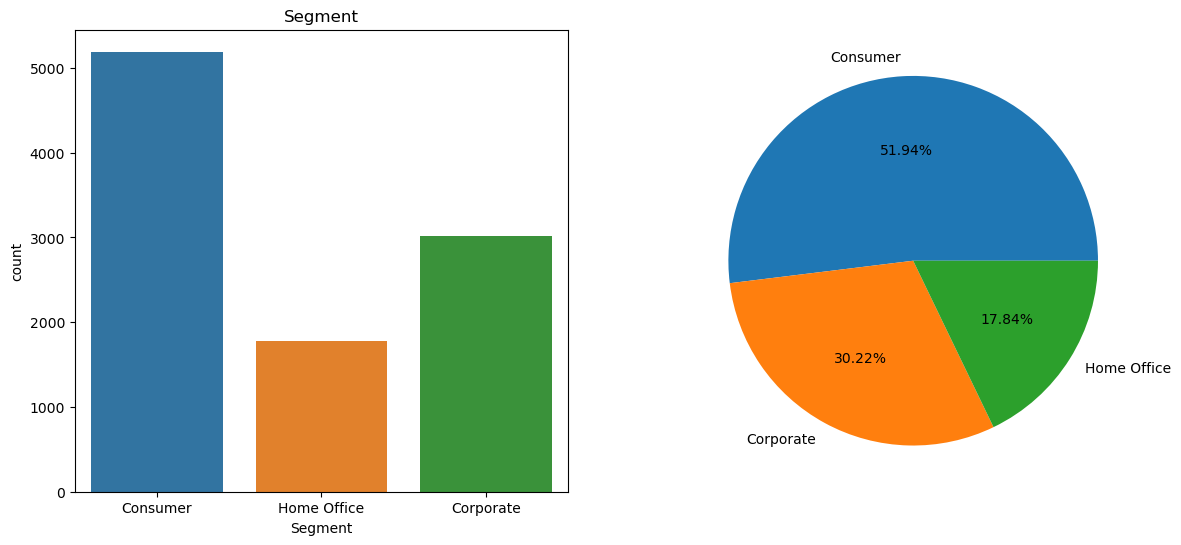

In [16]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].set_title('Segment')
shipmode=df['Segment'].value_counts()
labels=list(df['Segment'].value_counts().index)

sns.countplot(x=df['Segment'],ax=ax[0])
plt.pie(shipmode,labels=labels,autopct= "%0.2f%%")
plt.show()

### Most of the customers fall under the consumer segment.

## Exploring Feature: Region

In [17]:
info_of('Region')

unique values in Region are: ['Central' 'East' 'South' 'West']
mode of Region are: West
number of missing values in Region is: 0


### All the customers are from USA. Hence we explore the regions from where the customers are ordering.

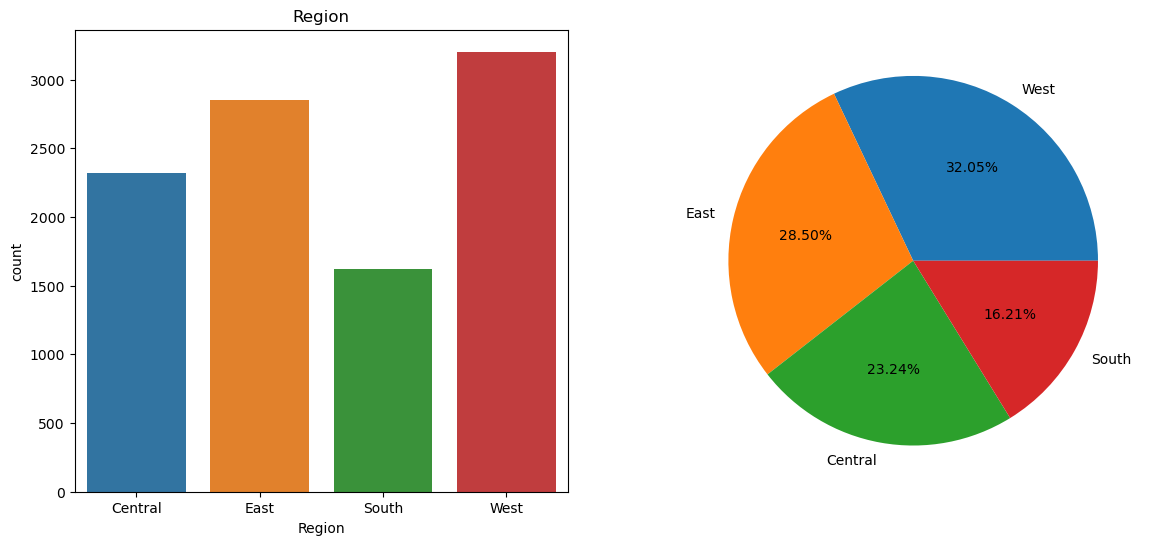

In [18]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].set_title('Region')
shipmode=df['Region'].value_counts()
labels=list(df['Region'].value_counts().index)

sns.countplot(x=df['Region'],ax=ax[0])
plt.pie(shipmode,labels=labels,autopct= "%0.2f%%")
plt.show()

### Most of the customers are from the west of USA and south has the least customers.

## Exploring Feature: Category

In [19]:
info_of('Category')

unique values in Category are: ['Office Supplies' 'Furniture' 'Technology']
mode of Category are: Office Supplies
number of missing values in Category is: 0


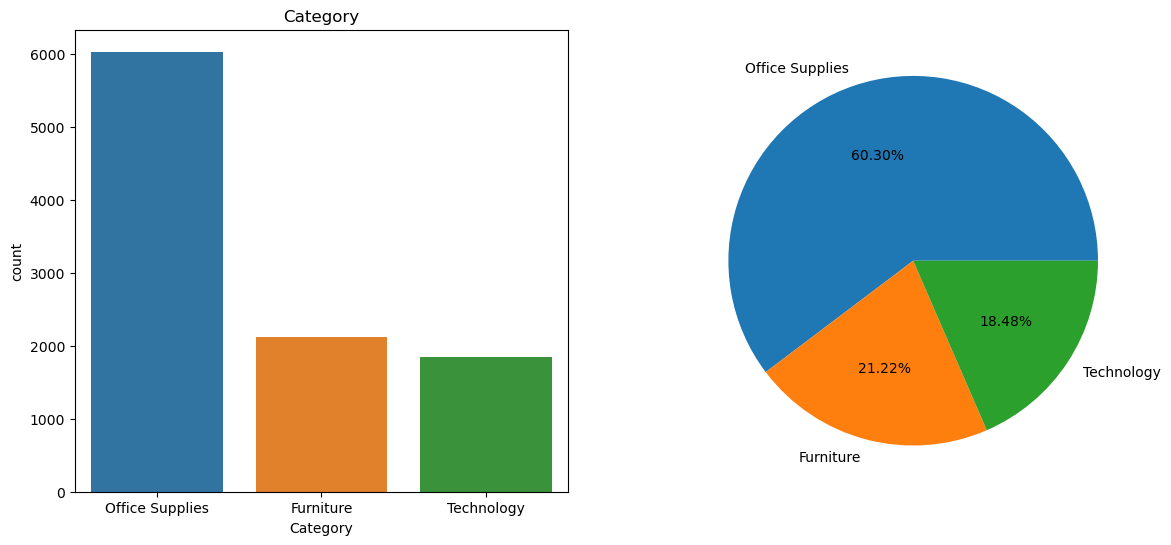

In [20]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
ax[0].set_title('Category')
shipmode=df['Category'].value_counts()
labels=list(df['Category'].value_counts().index)

sns.countplot(x=df['Category'],ax=ax[0])
plt.pie(shipmode,labels=labels,autopct= "%0.2f%%")
plt.show()

### Office Supplies are the most ordered category and Technology items are the least ordered category.

## Exploring Feature: Sub-Category

In [21]:
info_of('Sub-Category')

unique values in Sub-Category are: ['Paper' 'Labels' 'Storage' 'Binders' 'Art' 'Chairs' 'Phones' 'Fasteners'
 'Furnishings' 'Accessories' 'Envelopes' 'Bookcases' 'Appliances' 'Tables'
 'Supplies' 'Machines' 'Copiers']
mode of Sub-Category are: Binders
number of missing values in Sub-Category is: 0


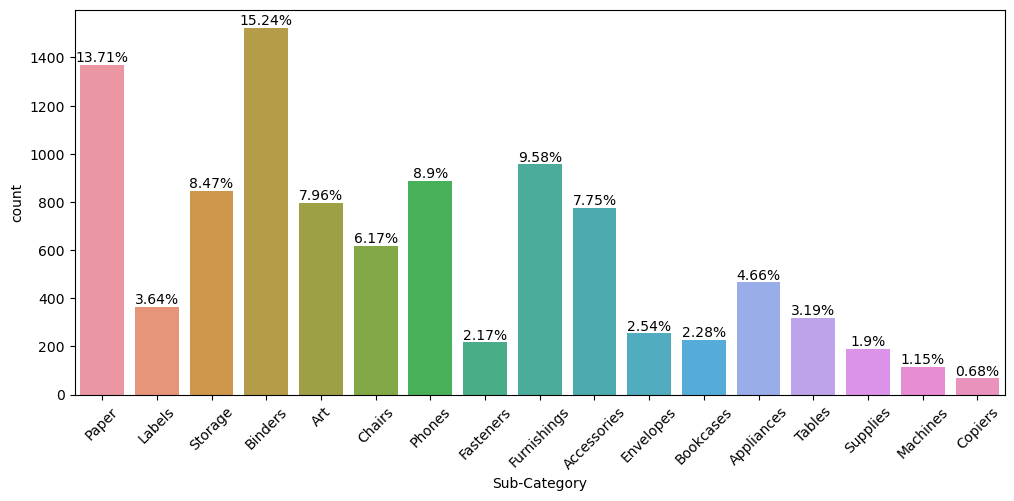

In [22]:
fig,ax=plt.subplots(figsize=(12,5))
data=df['Sub-Category'].value_counts()
labels=data.keys()
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=45)
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/len(df))*100,2)}%"
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
plt.show()

### Most customers buy binders and paper sub categories.

## Exploring Feature: Quantity:

In [23]:
info_of('Quantity')

unique values in Quantity are: [ 2  3  9  4  1  7  6  5 10 13  8 14 12 11]
mode of Quantity are: 3
number of missing values in Quantity is: 0


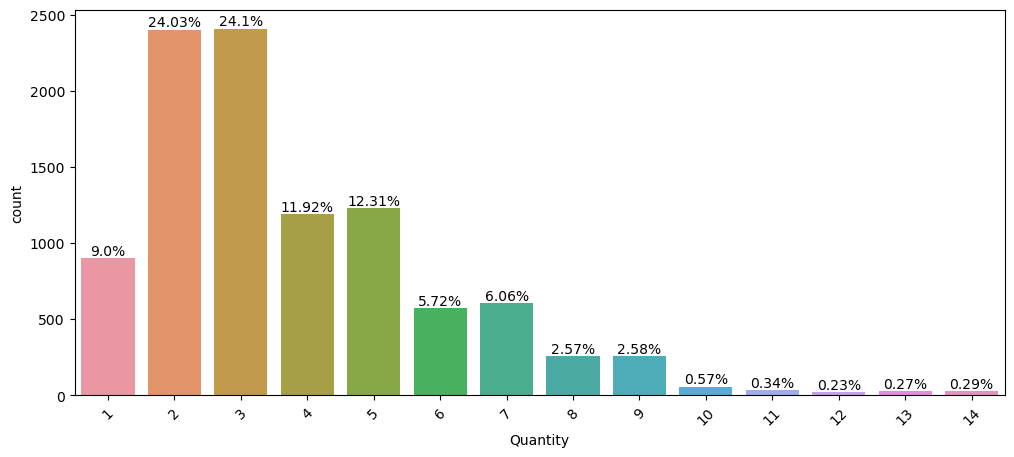

In [24]:
fig,ax=plt.subplots(figsize=(12,5))
data=df['Quantity'].value_counts()
labels=data.keys()
sns.countplot(x=df['Quantity'])
plt.xticks(rotation=45)
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/len(df))*100,2)}%"
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
plt.show()

### Most customers had ordered 2 or 3 items.

## Exploring Feature: Discount

In [25]:
info_of('Discount')

unique values in Discount are: [0.2  0.8  0.   0.6  0.7  0.15 0.5  0.4  0.1  0.3  0.32 0.45]
mode of Discount are: 0.0
number of missing values in Discount is: 0


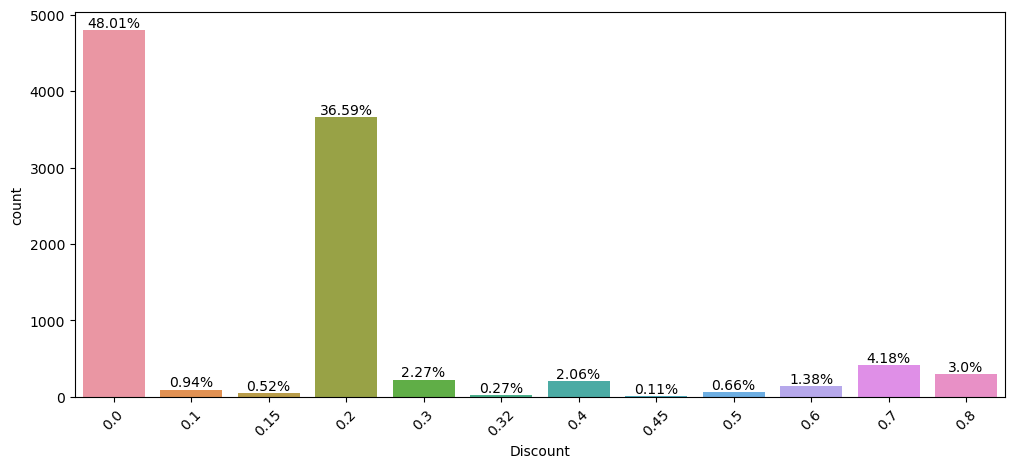

In [26]:
fig,ax=plt.subplots(figsize=(12,5))
data=df['Discount'].value_counts()
labels=data.keys()
sns.countplot(x=df['Discount'])
plt.xticks(rotation=45)
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/len(df))*100,2)}%"
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
plt.show()

### 48% customers got no discount and 36.6% customers got 20% discount.

## Exploring Feature: State

In [27]:
info_of('State')

unique values in State are: ['Texas' 'Illinois' 'Pennsylvania' 'Kentucky' 'Georgia' 'California'
 'Virginia' 'Delaware' 'Louisiana' 'Ohio' 'South Carolina' 'Oregon'
 'Arizona' 'Michigan' 'Tennessee' 'Arkansas' 'Florida' 'Indiana' 'Nevada'
 'South Dakota' 'New York' 'Wisconsin' 'Washington' 'New Jersey'
 'Missouri' 'North Carolina' 'Colorado' 'Utah' 'Mississippi' 'Minnesota'
 'Iowa' 'New Mexico' 'Massachusetts' 'Alabama' 'Montana' 'Idaho'
 'Maryland' 'Connecticut' 'New Hampshire' 'Oklahoma' 'Nebraska' 'Maine'
 'Kansas' 'Rhode Island' 'District of Columbia' 'Vermont' 'Wyoming'
 'North Dakota' 'West Virginia']
mode of State are: California
number of missing values in State is: 0


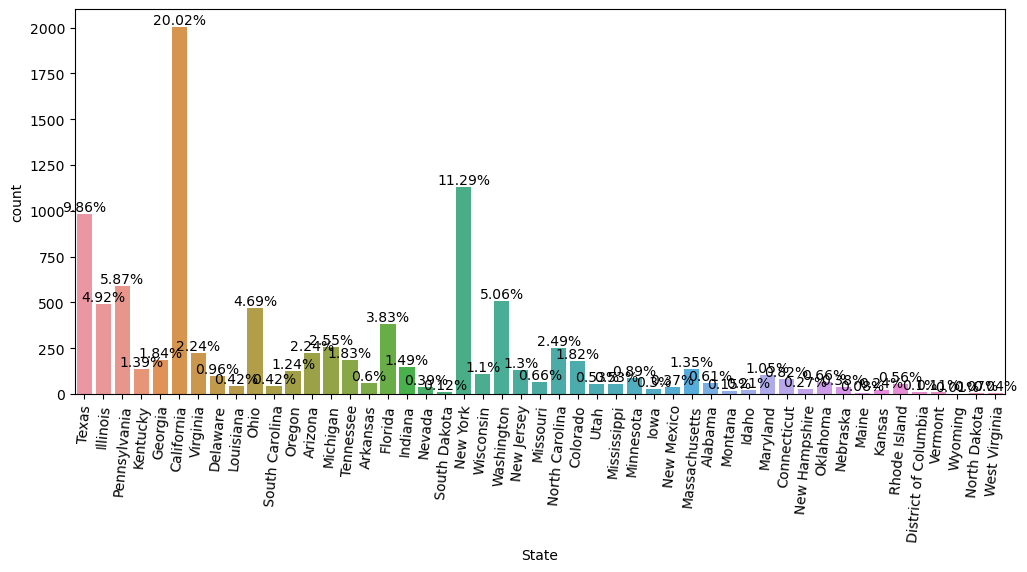

In [28]:
fig,ax=plt.subplots(figsize=(12,5))
data=df['State'].value_counts()
labels=data.keys()
sns.countplot(x=df['State'])
plt.xticks(rotation=85)
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/len(df))*100,2)}%"
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
plt.show()

### Most of the customers were from California followed by New York.

## Exploring Feature: City

In [29]:
info_of('City')

unique values in City are: ['Houston' 'Naperville' 'Philadelphia' 'Henderson' 'Athens' 'Los Angeles'
 'Huntsville' 'Laredo' 'Springfield' 'Dover' 'Bossier City'
 'San Francisco' 'Newark' 'Mount Pleasant' 'Roswell' 'Scottsdale'
 'Westland' 'Smyrna' 'Jonesboro' 'Miami' 'Lafayette' 'Las Vegas'
 'Alexandria' 'Rapid City' 'San Diego' 'New York City' 'Detroit'
 'Mission Viejo' 'Green Bay' 'Saint Petersburg' 'Seattle' 'Escondido'
 'Chesapeake' 'Romeoville' 'Linden' 'North Las Vegas' 'Columbia' 'Concord'
 'Dallas' 'Chicago' 'Arlington' 'Lubbock' 'Richmond' 'Woodstock'
 'Moreno Valley' 'El Paso' 'Medford' 'Columbus' 'Elmhurst' 'Wilmington'
 'Margate' 'Yonkers' 'Des Moines' 'Denver' 'Royal Oak' 'Roseville'
 'Huntington Beach' 'Jacksonville' 'Logan' 'Tampa' 'Raleigh' 'Jackson'
 'Lakeville' 'Burbank' 'Lakeland' 'Knoxville' 'Hamilton' 'Asheville'
 'Tucson' 'Greensboro' 'Portage' 'Delray Beach' 'Fresno' 'Pomona'
 'Albuquerque' 'Plano' 'Brownsville' 'Apple Valley' 'Long Beach' 'Vallejo'
 'Revere' 'Vi

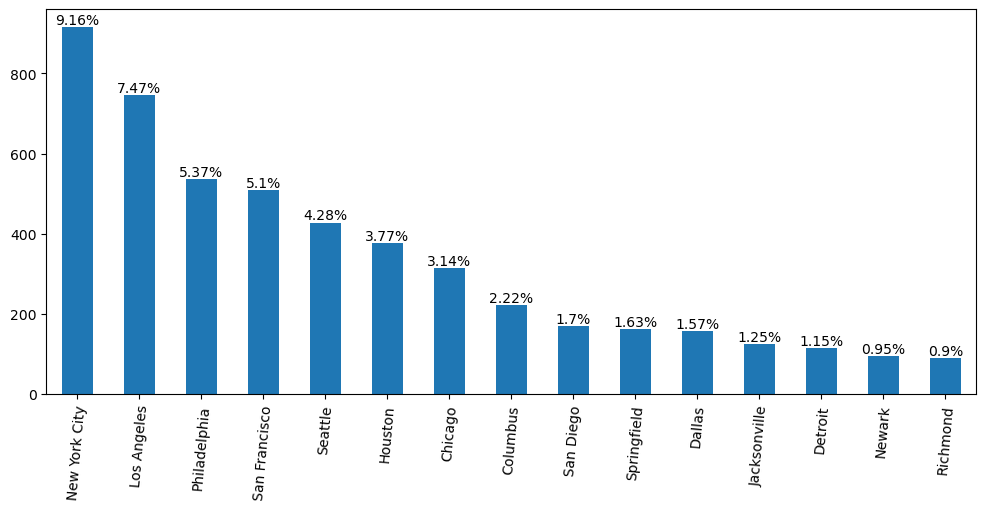

In [30]:
fig,ax=plt.subplots(figsize=(12,5))
data=df['City'].value_counts()
labels=data.keys()
data.head(15).plot(kind='bar')
plt.xticks(rotation=85)
for bar in ax.patches:
    percentage=f"{round((bar.get_height()/len(df))*100,2)}%"
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
plt.show()

### Most customers are from New York City, followed by Los Angeles.

## Resampling: 

In [31]:
sdf=fdf.drop(['Row ID','Postal Code','Quantity','Discount','Profit'],axis=1)

In [32]:
smax=fdf.resample('M').sum()
smax

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-31,346176,4342297,14236.8950,284,10.00,2450.1907
2014-02-28,272235,3049775,4519.8920,159,8.10,862.3084
2014-03-31,871575,8314538,55691.0090,585,26.30,498.7299
2014-04-30,690625,7723827,28295.3450,536,14.85,3488.8352
2014-05-31,611708,6497804,23648.2870,466,18.95,2738.7096
2014-06-30,491794,6827435,34595.1276,521,23.22,4976.5244
2014-07-31,746403,9046189,33946.3930,550,24.55,-841.4826
2014-08-31,729301,8628386,27909.4685,609,20.05,5318.1050
2014-09-30,1298740,14521813,81777.3508,1000,42.87,8328.0994


In [34]:
smax.Sales.isna().sum()

0

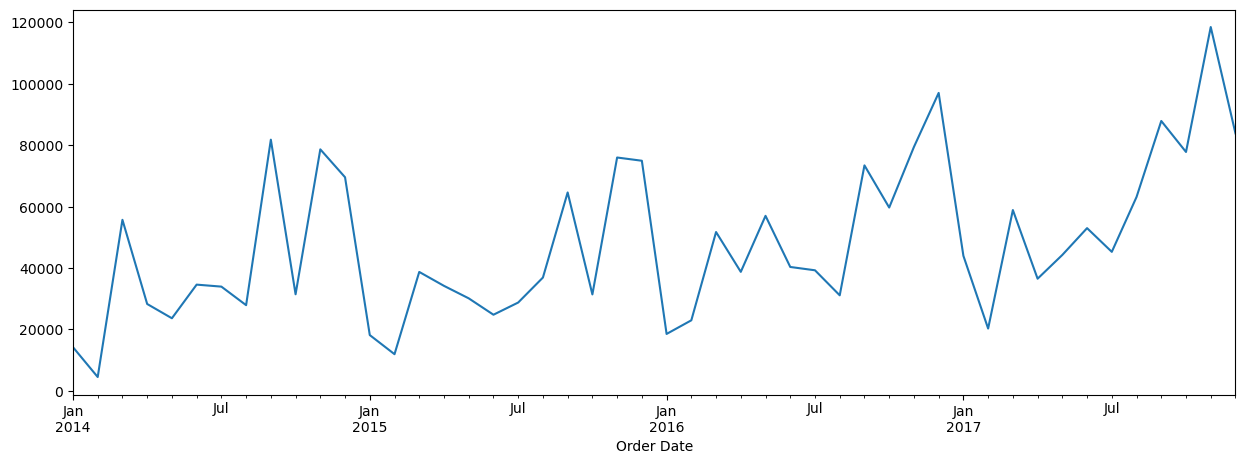

In [91]:
smax.Sales.plot(figsize=(15,5));

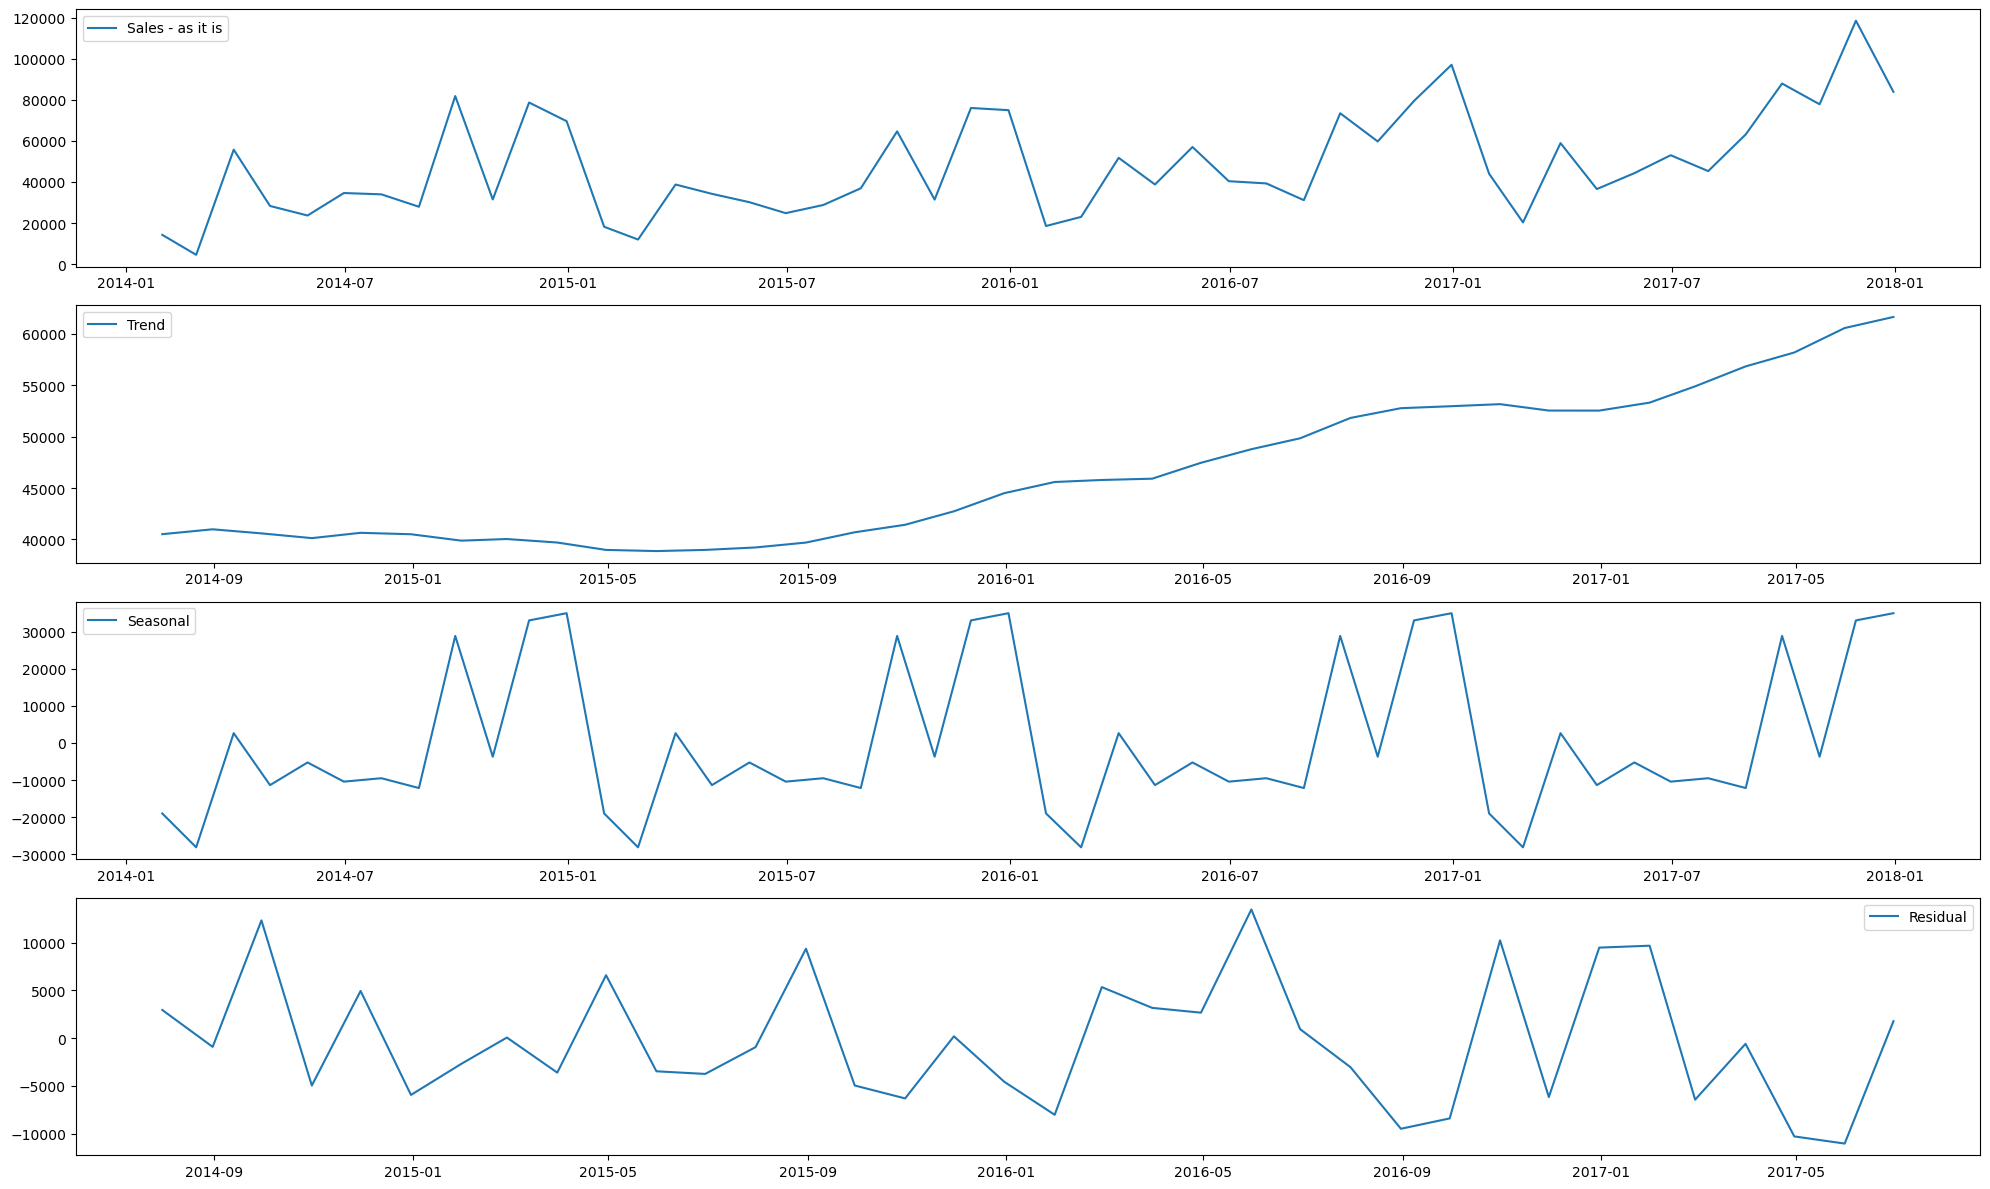

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(smax.Sales)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales,label='Sales - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

### Trend and seasonality is present in this data.

In [37]:
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [38]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [39]:
checkStationarity(smax.Sales)

'pvalue=0.00020180198458237758. Data is Stationary. Proceed to model building'

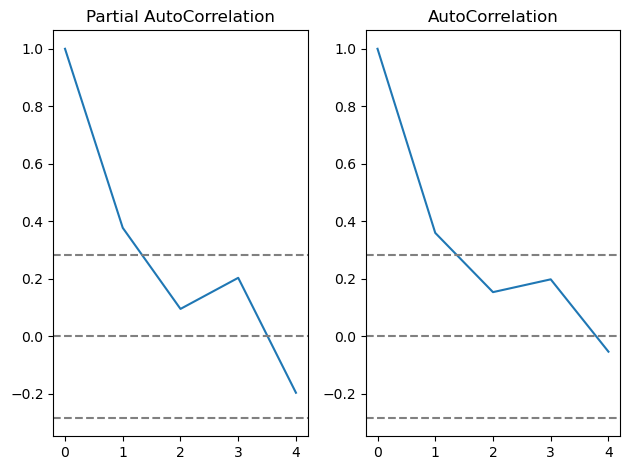

In [40]:
  # p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(smax.Sales, nlags=4)
lag_pacf = pacf(smax.Sales, nlags=4, method='ols')

# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(smax)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(smax)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(smax)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(smax)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

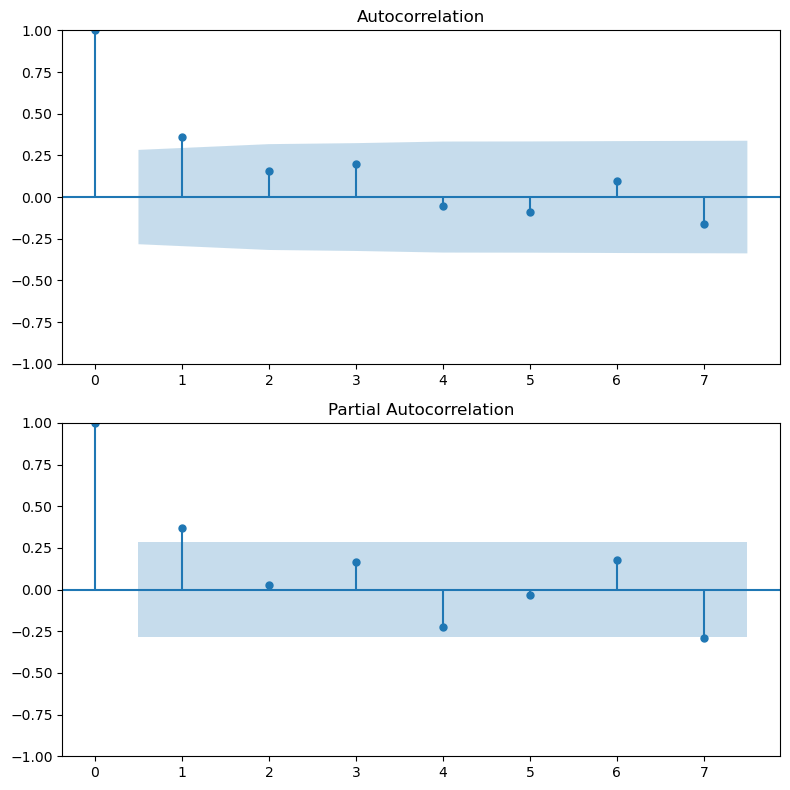

In [41]:
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(211)
sm.graphics.tsa.plot_acf(smax.Sales,lags=7,ax=ax1)
ax2=fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(smax.Sales,lags=7,ax=ax2)
plt.tight_layout()

### From ACF and PACF graphs we get the ideal values of p as 1 and q as 0.

## Using auto_arima to find best model:

In [42]:
# auto ARIMA (to help in the selection of p,d,q)
m= auto_arima(smax.Sales,start_p=0,max_p=5, start_q=0,max_q=5, seasonal=False, trace=True)
print(m.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1098.402, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1091.142, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1086.023, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1096.548, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1087.981, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1088.734, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1088.580, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1084.612, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1085.789, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1085.792, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1089.631, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1087.425, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.346 seconds
                               SARIMAX Results                                
Dep. Vari

### From auto_arima we get that the model arima(0,0,2)(0,0,0)[0] gives the least AIC score.

## ARMA Model:

In [85]:
# start with initial values for p and q
p=0; q=1
m1 = ARIMA(smax.Sales,order=(p,0,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -550.882
Date:                Fri, 25 Nov 2022   AIC                           1107.763
Time:                        21:38:00   BIC                           1113.377
Sample:                    01-31-2014   HQIC                          1109.885
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.786e+04   4488.852     10.662      0.000    3.91e+04    5.67e+04
ma.L1          0.3601      0.138      2.608      0.009       0.090       0.631
sigma2      5.352e+08      0.079   6.77e+09      0.0

In [86]:
# predictions
predictions = m1.predict()
print(predictions)

Order Date
2014-01-31    47858.351256
2014-02-28    37141.097209
2014-03-31    36283.862366
2014-04-30    54833.521806
2014-05-31    38304.412277
2014-06-30    42580.908044
2014-07-31    44982.715825
2014-08-31    43884.218052
2014-09-30    42105.908775
2014-10-31    62143.877391
2014-11-30    36806.831626
2014-12-31    62918.243386
2015-01-31    50244.843024
2015-02-28    36309.797260
2015-03-31    39086.994610
2015-04-30    47728.449297
2015-05-31    42985.085830
2015-06-30    43229.894000
2015-07-31    41220.845621
2015-08-31    43373.168518
2015-09-30    45526.788813
2015-10-31    54725.067763
2015-11-30    39460.861366
2015-12-31    61006.067929
2016-01-31    52868.529661
2016-02-29    35497.683184
2016-03-31    43350.357316
2016-04-30    50870.740433
2016-05-31    43493.735558
2016-06-30    52717.483508
2016-07-31    43402.902043
2016-08-31    46367.215809
2016-09-30    42366.224645
2016-10-31    59037.098517
2016-11-30    48092.646431
2016-12-31    59136.311839
2017-01-31    614

<AxesSubplot:xlabel='Order Date'>

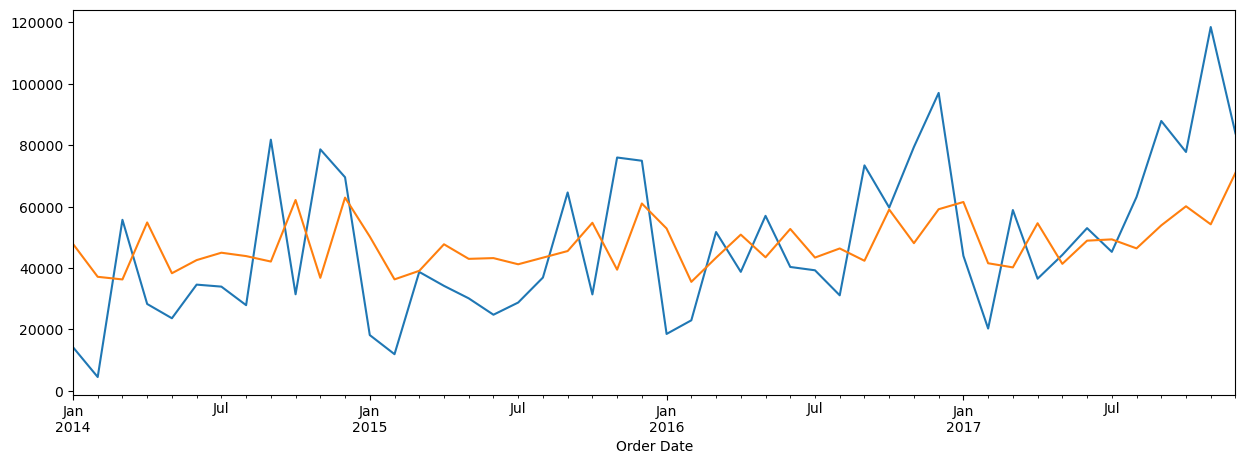

In [87]:
smax.Sales.plot(figsize=(15,5))
predictions.plot()

In [88]:
mse1 = mean_squared_error(smax.Sales,predictions)       #root mean square error
print('RMSE: ' + str(np.sqrt(mse1) ))

RMSE: 23366.626608204264


### Forecasting:

In [89]:
f1=m1.forecast(20)
f1

2018-01-31    52483.638807
2018-02-28    47858.351256
2018-03-31    47858.351256
2018-04-30    47858.351256
2018-05-31    47858.351256
2018-06-30    47858.351256
2018-07-31    47858.351256
2018-08-31    47858.351256
2018-09-30    47858.351256
2018-10-31    47858.351256
2018-11-30    47858.351256
2018-12-31    47858.351256
2019-01-31    47858.351256
2019-02-28    47858.351256
2019-03-31    47858.351256
2019-04-30    47858.351256
2019-05-31    47858.351256
2019-06-30    47858.351256
2019-07-31    47858.351256
2019-08-31    47858.351256
Freq: M, Name: predicted_mean, dtype: float64

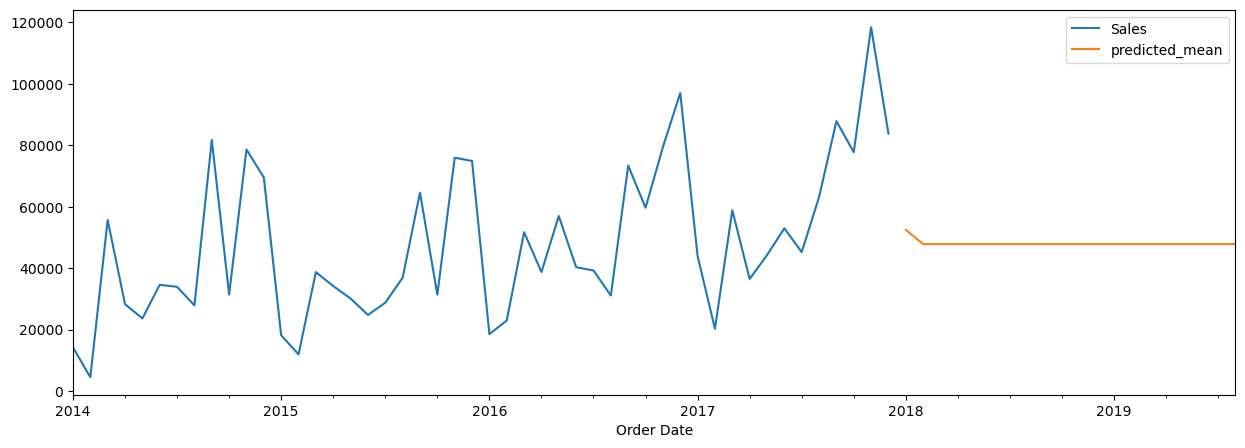

In [90]:
smax.Sales.plot(figsize=(15,5),legend=True)
f1.plot(legend=True)
plt.show()

### ARMA model provides an inconsistent forecast values.

## ARIMA Model:

In [49]:
p=0; d=1; q=1
m2 = ARIMA(smax.Sales,order=(p,d,q)).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -540.306
Date:                Fri, 25 Nov 2022   AIC                           1084.612
Time:                        17:29:57   BIC                           1088.313
Sample:                    01-31-2014   HQIC                          1086.005
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6534      0.123     -5.315      0.000      -0.894      -0.412
sigma2      5.981e+08   2.21e-13    2.7e+21      0.000    5.98e+08    5.98e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.15
Prob(Q):                              0.88   Prob(JB):                         0.93
Heteroskedasticity (H):               1.05   Skew:                            -0.00
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [50]:
# predictions
predictions2 = m2.predict()
print(predictions2)

Order Date
2014-01-31        0.000000
2014-02-28     7725.191417
2014-03-31     6376.514713
2014-04-30    24957.059625
2014-05-31    26156.203953
2014-06-30    25273.631994
2014-07-31    28525.302016
2014-08-31    30409.280865
2014-09-30    29541.920249
2014-10-31    47653.643151
2014-11-30    42038.133486
2014-12-31    54719.980373
2015-01-31    59858.090971
2015-02-28    45412.023325
2015-03-31    33815.981985
2015-04-30    35517.668044
2015-05-31    35059.361888
2015-06-30    33351.648208
2015-07-31    30387.088807
2015-08-31    29825.057678
2015-09-30    32276.339556
2015-10-31    43476.865520
2015-11-30    39293.268298
2015-12-31    52004.677659
2016-01-31    59945.941374
2016-02-29    45597.350370
2016-03-31    37758.773873
2016-04-30    42595.683207
2016-05-31    41262.954284
2016-06-30    46712.460170
2016-07-31    44505.620709
2016-08-31    42688.402601
2016-09-30    38677.706676
2016-10-31    50714.380528
2016-11-30    53824.148808
2016-12-31    62691.746005
2017-01-31    745

<AxesSubplot:xlabel='Order Date'>

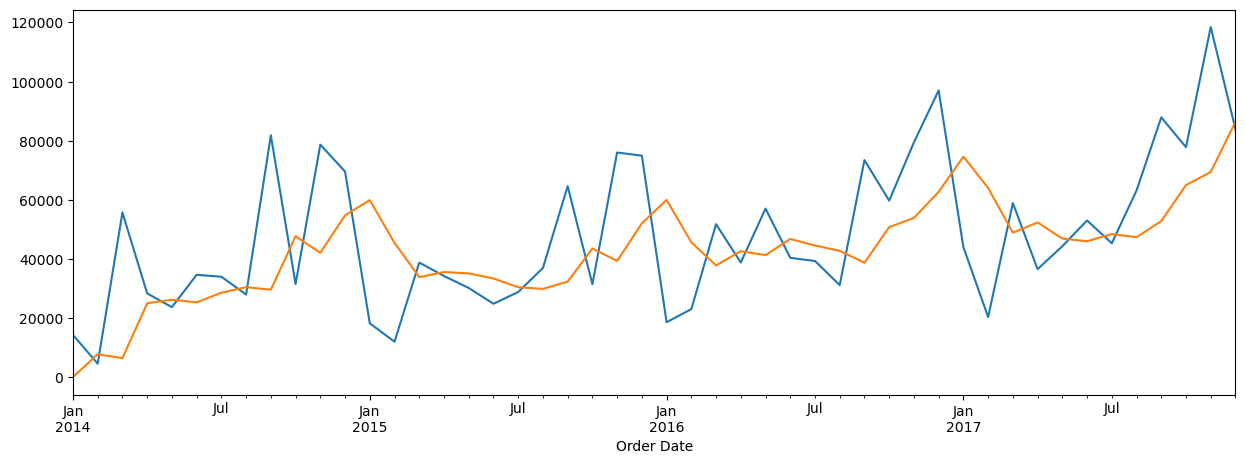

In [51]:
smax.Sales.plot(figsize=(15,5))
predictions2.plot()

In [52]:
mse2 = mean_squared_error(smax.Sales,predictions2)       #root mean square error
print('RMSE: ' + str(np.sqrt(mse2) ))

RMSE: 23607.31425054907


### Forecasting:

In [81]:
f2=m2.forecast(20)
f2

2018-01-31    85503.666157
2018-02-28    85503.666157
2018-03-31    85503.666157
2018-04-30    85503.666157
2018-05-31    85503.666157
2018-06-30    85503.666157
2018-07-31    85503.666157
2018-08-31    85503.666157
2018-09-30    85503.666157
2018-10-31    85503.666157
2018-11-30    85503.666157
2018-12-31    85503.666157
2019-01-31    85503.666157
2019-02-28    85503.666157
2019-03-31    85503.666157
2019-04-30    85503.666157
2019-05-31    85503.666157
2019-06-30    85503.666157
2019-07-31    85503.666157
2019-08-31    85503.666157
Freq: M, Name: predicted_mean, dtype: float64

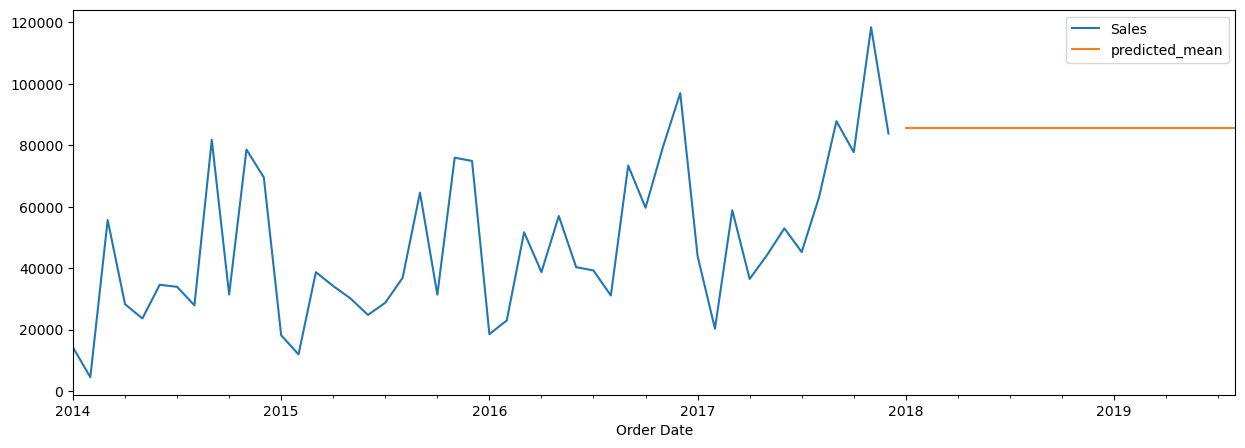

In [82]:
smax.Sales.plot(figsize=(15,5),legend=True)
f2.plot(legend=True)
plt.show()

### ARIMA model provides slightly better forecast values than ARMA but is still not dependable.

## SARIMA Model:

In [55]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
p=0; q=1; d=1
m3 = sm.tsa.statespace.SARIMAX(smax.Sales,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -384.340
Date:                            Fri, 25 Nov 2022   AIC                            774.680
Time:                                    17:29:57   BIC                            779.346
Sample:                                01-31-2014   HQIC                           776.291
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3968      0.142     -2.787      0.005      -0.676      -0.118
ma.S.L12      -0.4128      0.148     -2.789      0.005      -0.703      -0.123
sigma2      2.435e+08   8.98e-11   2.71e+18      0.000    2.43e+08    2.43e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.35   Prob(JB):                         0.64
Heteroskedasticity (H):               1.60   Skew:                            -0.38
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.84e+33. Standard errors may be unstable.
"""

In [56]:
# predictions
predictions3 = m3.predict()
print(predictions3)

Order Date
2014-01-31         0.000000
2014-02-28      9385.630003
2014-03-31      6402.130806
2014-04-30     36278.279729
2014-05-31     31448.191586
2014-06-30     26730.175468
2014-07-31     31487.328350
2014-08-31     32974.694826
2014-09-30     29910.993452
2014-10-31     61282.346566
2014-11-30     43240.312023
2014-12-31     66964.471469
2015-01-31     77833.923863
2015-02-28     35115.769483
2015-03-31     54291.128120
2015-04-30     27150.964011
2015-05-31     28389.555420
2015-06-30     36540.191616
2015-07-31     29043.194820
2015-08-31     24982.938263
2015-09-30     67096.899941
2015-10-31     32987.822543
2015-11-30     62601.143755
2015-12-31     64366.009316
2016-01-31     43768.809222
2016-02-29     22272.403680
2016-03-31     52051.007394
2016-04-30     41996.657484
2016-05-31     36397.559893
2016-06-30     48490.205316
2016-07-31     45781.502554
2016-08-31     45140.199592
2016-09-30     67287.801003
2016-10-31     38028.852284
2016-11-30     90026.154572
2016-12-3

<AxesSubplot:xlabel='Order Date'>

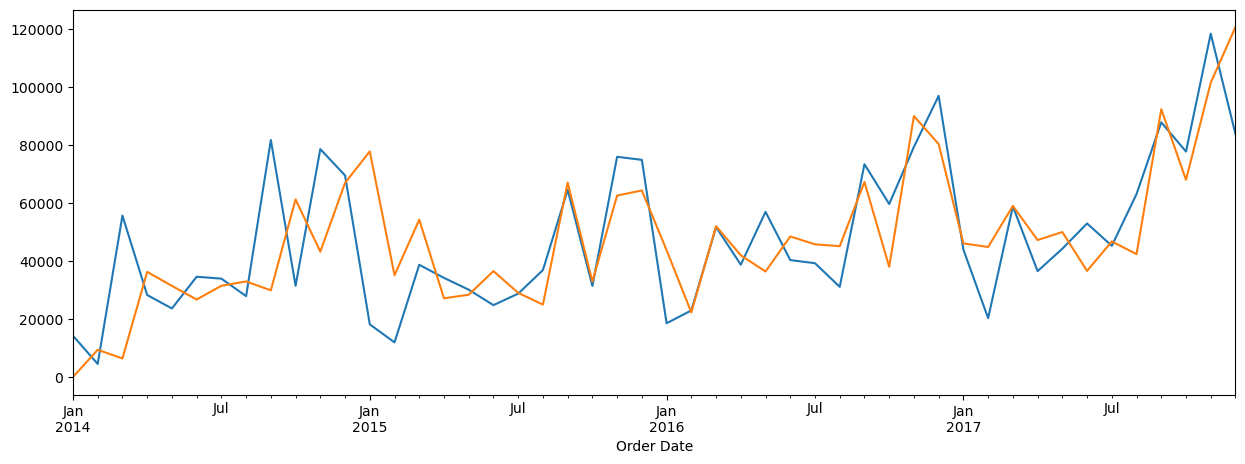

In [57]:
smax.Sales.plot(figsize=(15,5))
predictions3.plot()

In [58]:
mse3 = mean_squared_error(smax.Sales,predictions3)       #root mean square error
print('RMSE: ' + str(np.sqrt(mse3) ))

RMSE: 19458.747590904557


### Forecasting:

In [79]:
f3=m3.forecast(20)
f3

2018-01-31     49034.992481
2018-02-28     35146.484236
2018-03-31     69765.544966
2018-04-30     51813.882899
2018-05-31     60174.216918
2018-06-30     61198.960145
2018-07-31     56775.787211
2018-08-31     65845.822420
2018-09-30     95848.823399
2018-10-31     81000.296997
2018-11-30    116287.810344
2018-12-31     99667.588870
2019-01-31     58830.234521
2019-02-28     44941.726276
2019-03-31     79560.787006
2019-04-30     61609.124940
2019-05-31     69969.458958
2019-06-30     70994.202185
2019-07-31     66571.029251
2019-08-31     75641.064460
Freq: M, Name: predicted_mean, dtype: float64

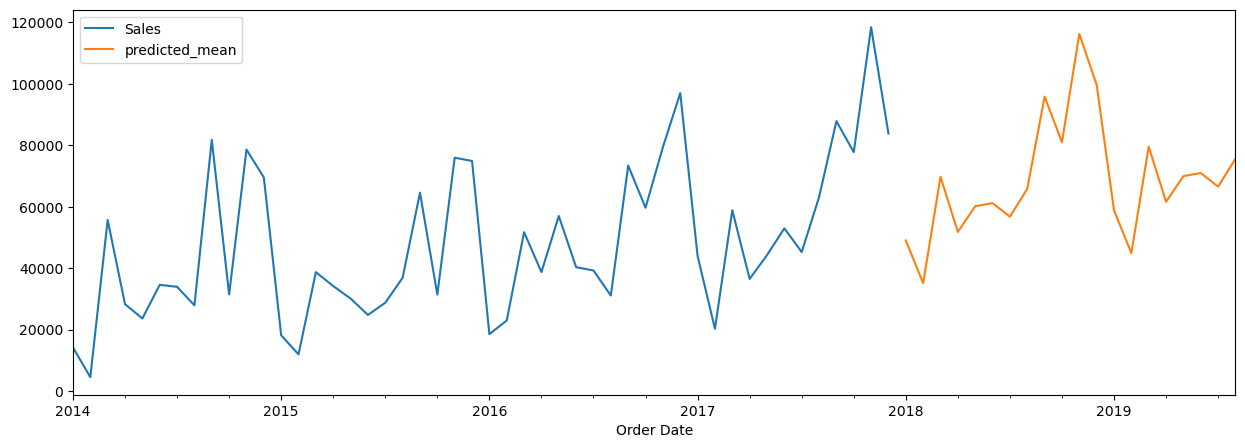

In [80]:
smax.Sales.plot(figsize=(15,5),legend=True)
f3.plot(legend=True)
plt.show()

### SARIMA model provides forecasted values better than ARMA and ARIMA models, hence SARIMA model seems to be a better model.

## SARIMAX Model:

In [61]:
exog = smax[['Quantity','Discount','Profit']] 
print(exog.head(5))
print('exog = {}'.format( len(exog)))

            Quantity  Discount     Profit
Order Date                               
2014-01-31       284     10.00  2450.1907
2014-02-28       159      8.10   862.3084
2014-03-31       585     26.30   498.7299
2014-04-30       536     14.85  3488.8352
2014-05-31       466     18.95  2738.7096
exog = 48


In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
m4 = SARIMAX(smax.Sales, order=(0,1,1), seasonal_order=(p,d,q,12), exog = exog.values).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -365.083
Date:                            Fri, 25 Nov 2022   AIC                            742.166
Time:                                    17:29:59   BIC                            751.498
Sample:                                01-31-2014   HQIC                           745.387
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            51.5592     18.818      2.740      0.006      14.676      88.442
x2            74.9057    448.995      0.167      0.868    -805.108     954.920
x3             1.0883      0.506      2.149      0.032       0.096       2.081
ma.L1         -0.9927      0.416     -2.387      0.017      -1.808      -0.178
ma.S.L12      -0.7091      0.454     -1.562      0.118      -1.599       0.181
sigma2       6.43e+07    1.9e-05   3.39e+12      0.000    6.43e+07    6.43e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.43   Prob(JB):                         0.78
Heteroskedasticity (H):               2.34   Skew:                            -0.04
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.39e+30. Standard errors may be unstable.
"""

In [63]:
predictions4 = m4.predict()
predictions4

Order Date
2014-01-31     18058.440913
2014-02-28      7812.577001
2014-03-31     29624.189333
2014-04-30     36262.245023
2014-05-31     30449.517815
2014-06-30     34799.752785
2014-07-31     30029.730017
2014-08-31     40013.522107
2014-09-30     63512.462416
2014-10-31     37214.293662
2014-11-30     77876.267558
2014-12-31     71331.162605
2015-01-31      8910.489087
2015-02-28     16530.451383
2015-03-31     53378.594768
2015-04-30     33005.894704
2015-05-31     34733.544183
2015-06-30     30982.290799
2015-07-31     36117.142396
2015-08-31     31660.611597
2015-09-30     76836.879044
2015-10-31     33830.237785
2015-11-30     84074.790540
2015-12-31     70878.200840
2016-01-31     21866.280714
2016-02-29     15399.689352
2016-03-31     41110.405512
2016-04-30     34860.449021
2016-05-31     51688.129051
2016-06-30     42534.558169
2016-07-31     44615.321588
2016-08-31     34832.959875
2016-09-30     84725.658603
2016-10-31     53221.012193
2016-11-30     76168.952896
2016-12-3

<AxesSubplot:xlabel='Order Date'>

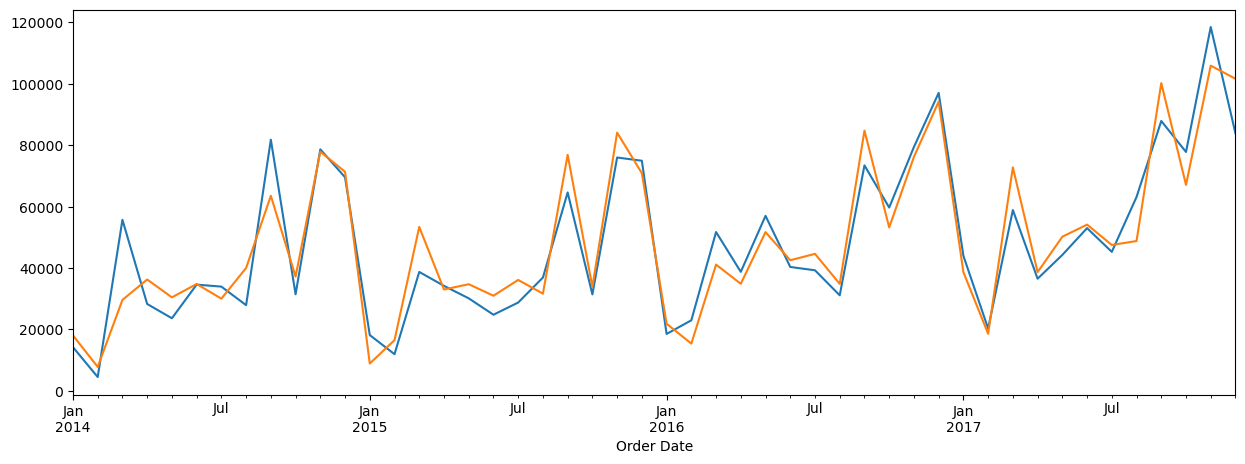

In [64]:
smax.Sales.plot(figsize=(15,5))
predictions4.plot()

In [65]:
mse4 = mean_squared_error(smax.Sales,predictions4)       #root mean square error
print('RMSE: ' + str(np.sqrt(mse4) ))

RMSE: 8809.564144406884


### Forecasting:

In [70]:
f4=m4.forecast(len(smax),exog=exog.values)
f4

2018-01-31     16227.537122
2018-02-28      4954.552149
2018-03-31     34988.508925
2018-04-30     27289.033235
2018-05-31     19966.563338
2018-06-30     26525.320114
2018-07-31     21722.161874
2018-08-31     33196.507355
2018-09-30     56022.331884
2018-10-31     32132.364720
2018-11-30     73987.370012
2018-12-31     60556.409359
2019-01-31      6271.554637
2019-02-28      9950.339339
2019-03-31     39638.941528
2019-04-30     28138.741701
2019-05-31     26815.228251
2019-06-30     21710.507225
2019-07-31     25257.680793
2019-08-31     31763.624519
2019-09-30     58941.575812
2019-10-31     33280.746905
2019-11-30     81213.736380
2019-12-31     63904.897457
2020-01-31     18049.847437
2020-02-29     14498.711461
2020-03-31     35892.736758
2020-04-30     30174.284339
2020-05-31     46035.602453
2020-06-30     35466.264676
2020-07-31     36212.778720
2020-08-31     32393.610579
2020-09-30     71720.026032
2020-10-31     53778.673647
2020-11-30     76114.072715
2020-12-31     84577

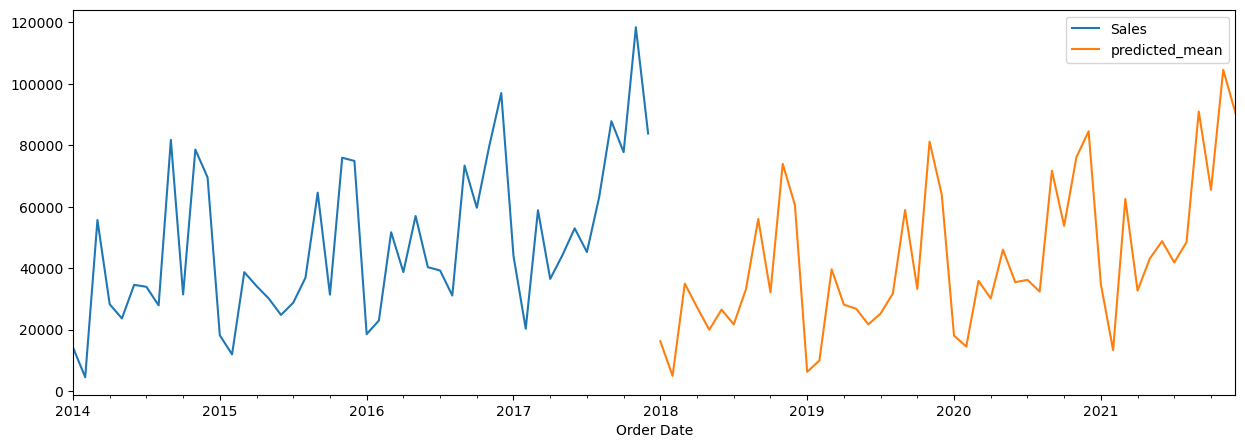

In [71]:
smax.Sales.plot(figsize=(15,5),legend=True)
f4.plot(legend=True)
plt.show()

### The SARIMAX model gives the least RMSE and provides a better forecasting compared to other models, hence we can conclude that SARIMAX is the best model.